In [70]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from IPython.display import Image

In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
# Import dataset
import pathlib
path = "drive/My Drive/uas/training"
data_dir = pathlib.Path(path)

In [73]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

15


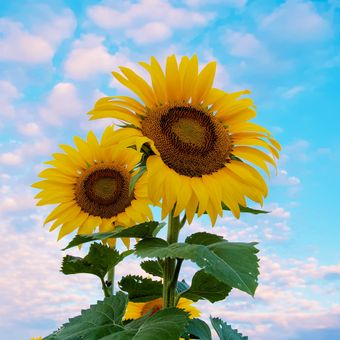

In [74]:
Bunga = list(data_dir.glob('bunga1/*'))
PIL.Image.open(str(Bunga[1]))


In [75]:
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
data_dir,
validation_split=0.2,
subset="training",
seed=123,
image_size=(img_height, img_width),
batch_size=batch_size)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
data_dir,
validation_split=0.2,
subset="validation",
seed=123,
image_size=(img_height, img_width),
batch_size=batch_size)

Found 15 files belonging to 2 classes.
Using 12 files for training.
Found 15 files belonging to 2 classes.
Using 3 files for validation.


In [76]:
class_names = train_ds.class_names
print(class_names)

['bunga1', 'non bunga']


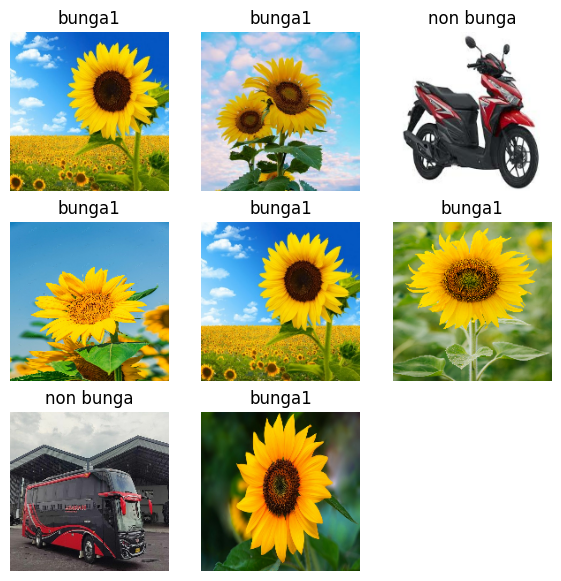

In [77]:
plt.figure(figsize=(7, 7)) #is the size of the image that we will display
for images, labels in train_ds.take(1):
    for i in range(8):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off") # Indent the code block within the for loop

In [78]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max( first_image))

0.0 1.0


In [79]:
num_classes = 2
model = Sequential([
layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
layers.Conv2D(16, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(32, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(64, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Flatten(),
layers.Dense(128, activation='relu'),
layers.Dense(num_classes)])

In [80]:
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 64)       

In [81]:
epochs=30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
1/1 [==============================] - 6s 6s/step - loss: 0.6928 - accuracy: 0.5000 - val_loss: 8.7364 - val_accuracy: 0.3333
Epoch 2/30
1/1 [==============================] - 0s 167ms/step - loss: 1.9481 - accuracy: 0.8333 - val_loss: 5.3304 - val_accuracy: 0.3333
Epoch 3/30
1/1 [==============================] - 0s 146ms/step - loss: 1.0931 - accuracy: 0.8333 - val_loss: 1.9192 - val_accuracy: 0.3333
Epoch 4/30
1/1 [==============================] - 0s 138ms/step - loss: 0.3390 - accuracy: 0.8333 - val_loss: 0.6345 - val_accuracy: 1.0000
Epoch 5/30
1/1 [==============================] - 0s 142ms/step - loss: 0.4101 - accuracy: 0.9167 - val_loss: 0.6022 - val_accuracy: 0.6667
Epoch 6/30
1/1 [==============================] - 0s 139ms/step - loss: 0.3924 - accuracy: 0.9167 - val_loss: 0.8239 - val_accuracy: 0.3333
Epoch 7/30
1/1 [==============================] - 0s 162ms/step - loss: 0.2211 - accuracy: 1.0000 - val_loss: 1.4799 - val_accuracy: 0.3333
Epoch 8/30
1/1 [=======

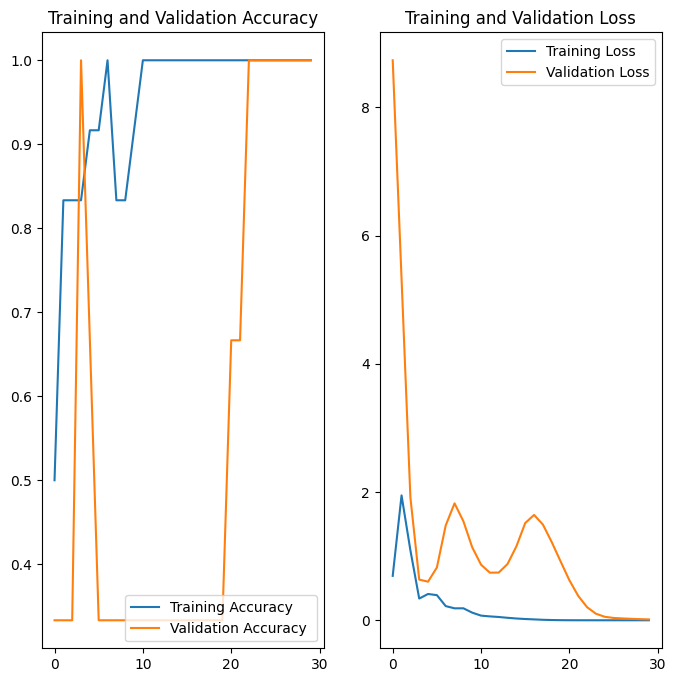

In [82]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy ')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right' )
plt.title('Training and Validation Loss')
plt.show()

1/1 [==============================] - 0s 318ms/step


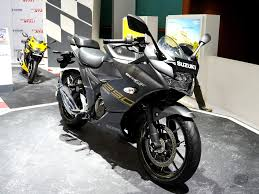

This image most likely belongs to non bunga with a 99.62 percent confidence .


In [85]:
path = "/content/drive/MyDrive/uas/training/non bunga/17.jpg"
img = keras.preprocessing.image.load_img(
path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array (img)
img_array = tf.expand_dims(img_array, 0)
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
display(Image(filename=path))
print(
"This image most likely belongs to {} with a {:.2f} percent confidence ."
.format(class_names[np.argmax(score)], 100 * np.max(score))
)
